# Aprendizaje Supervisado

## Super Verctor Machine (SVM)

Las máquinas de vectores de soporte (SVM) son una clase de algoritmos supervisados para clasificación y regresión.
Son más populares en problemas de clasificación. En este algoritmo, trazamos cada elemento de datos como un punto en el espacio de n dimensiones (donde n es el número de variables que tiene). Luego, realizamos la clasificación encontrando el mejor hiperplano que diferencia las dos clases.

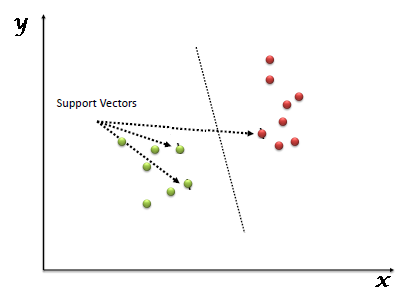

Los vectores de soporte son las coordenadas de la observación individual. 

Support Vector Machine es una frontera que mejor separa las dos clases (hiperplano / línea).

## Resolvamos un caso de manera intuitiva

### Caso linealmente separable

Imaginemos que tenemos dos clases que pretendemos clasificar (rojo y azul), y nuestra data tienen dos features x e y. 
Queremos un clasificador que, dado un par de coordenadas (x, y), estime el resultados si es rojo o azul. Trazamos nuestros datos de entrenamiento ya etiquetados en un plano:
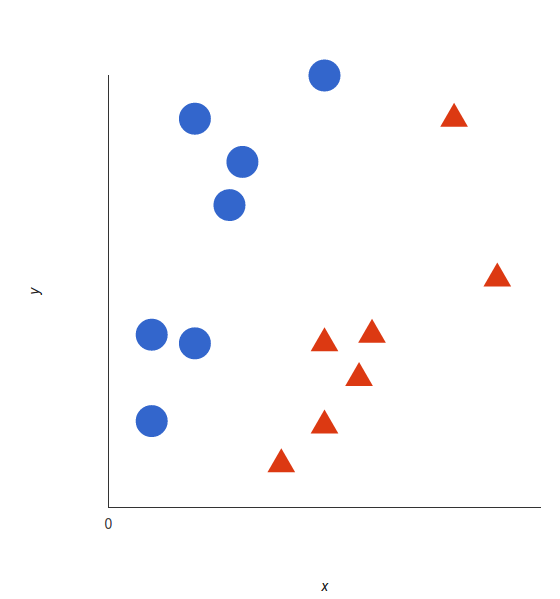

Una máquina de vectores de soporte toma estos puntos de datos y genera el hiperplano (que en dos dimensiones es simplemente una línea) que mejor separa las etiquetas/clases. Esta línea es el límite de decisión: cualquier punto que caiga a un lado de ella la clasificaremos como azul, y cualquier cosa que caiga en el otro será roja.
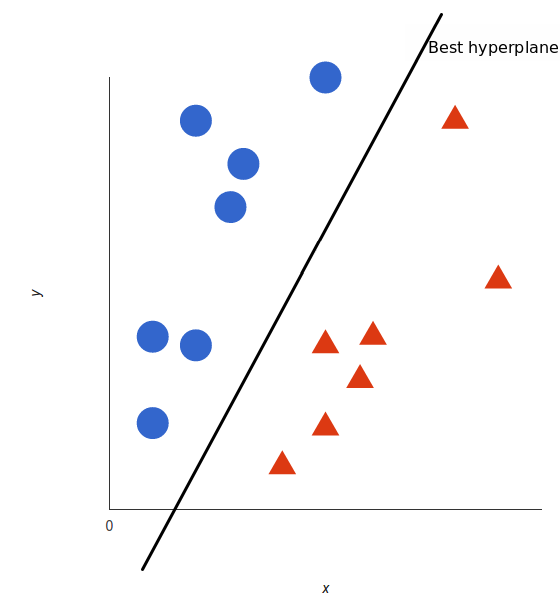

Pero, ¿cuál es exactamente el mejor hiperplano? Para SVM, es el que maximiza los márgenes de ambas etiquetas. En otras palabras: el hiperplano (recuerde que es una línea en este caso) cuya distancia al elemento más cercano de cada etiqueta sea la mayor.
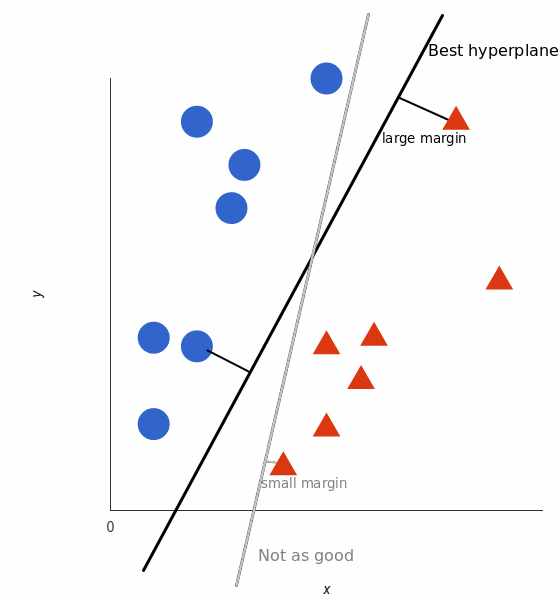

### Caso no lineal
Ahora el ejemplo anterior fue fácil, ya que claramente, los datos eran linealmente separables, podríamos dibujar una línea recta para separar el rojo y el azul. En la vida real, muchos de los casos no son linealmente separables. Veamos el siguiente caso:
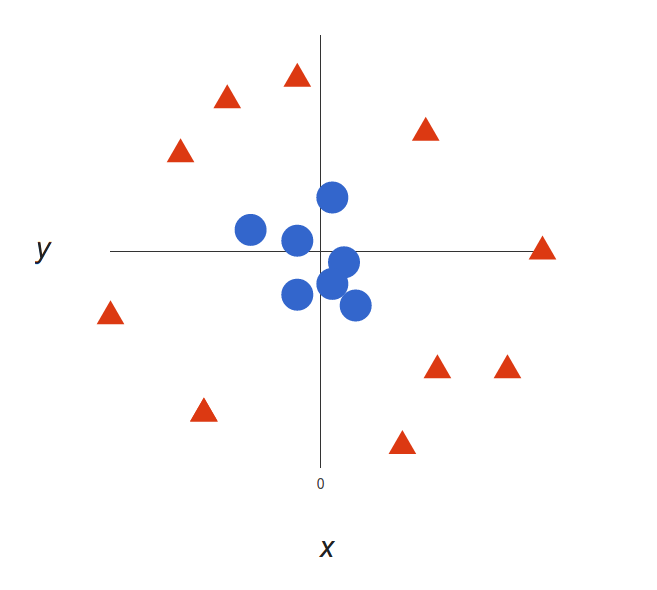

Queda claro que no hay un límite de decisión lineal (una sola línea recta que separa ambas clases). Sin embargo, los vectores están muy claramente segregados, y parece que debería ser fácil separarlos.

Así que esto es lo que haremos: agregaremos una tercera dimensión. Hasta ahora, teníamos dos dimensiones: x e y. Creamos una nueva dimensión z, y decidimos que se calcule de cierta manera que sea conveniente para nosotros: z = x² + y² (notará que esa es la ecuación de un círculo).

Esto nos dará un espacio tridimensional. Tomando una porción de ese espacio, queda como se muestra en seguida:
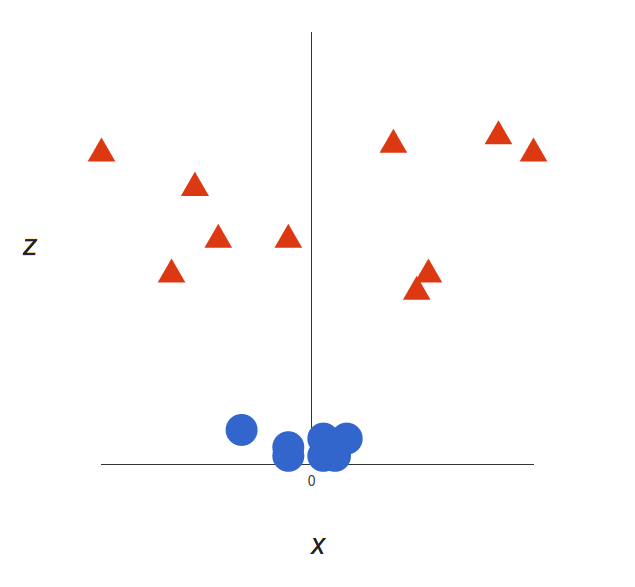

¿Qué puede hacer SVM con esto? Veamos:
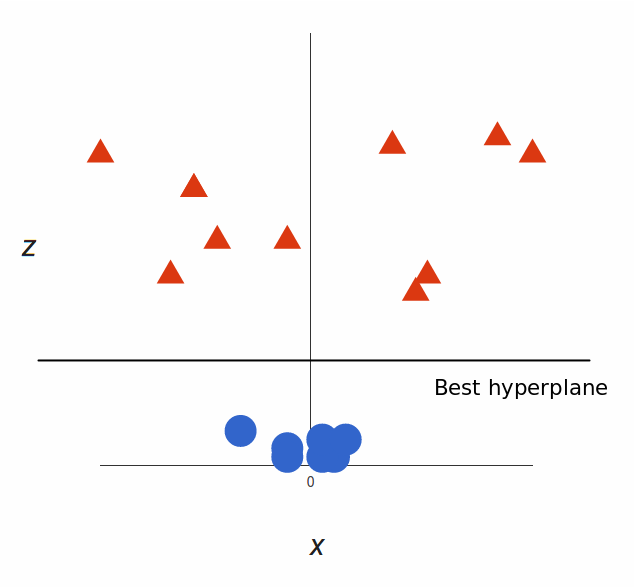


¡Ahora si podemos separar las dos clases! Tenga en cuenta que dado que estamos en tres dimensiones ahora, el hiperplano es un plano paralelo al eje x en cierta z (digamos z = 1).

Veamos como se ve en dos dimensiones:
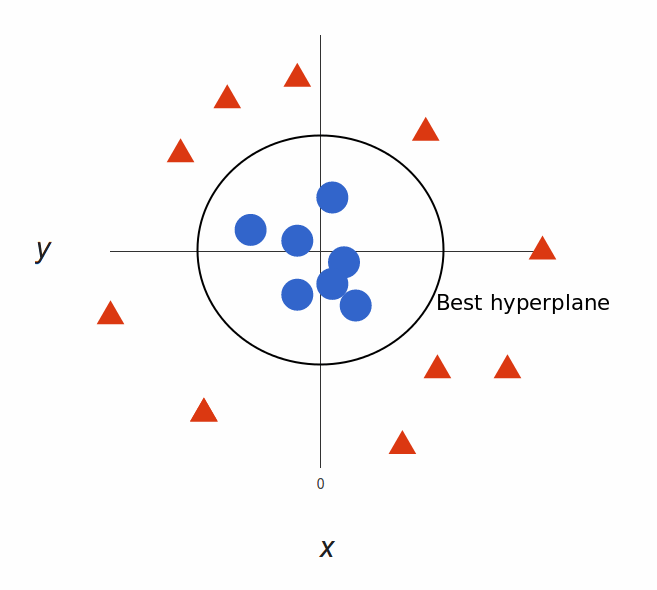

Encontramos la solución! Nuestro límite de decisión es una circunferencia de radio 1, que separa ambas etiquetas usando SVM.

## Truco del kernel

En el ejemplo anterior, encontramos una forma de clasificar datos no lineales al mapear hábilmente nuestro espacio a una dimensión superior. Sin embargo, resulta que el cálculo de esta transformación puede ser bastante costoso desde el punto de vista computacional, puede haber muchas dimensiones nuevas, cada una de las cuales puede implicar un cálculo complicado. Hacer esto para cada vector en el conjunto de datos puede ser mucho trabajo, por lo que sería genial si pudiéramos encontrar una solución más barata.

- Imagine el nuevo espacio que queremos: 


- Averigua cómo se ve el producto escalar en ese espacio:


- Luego hagamos que SVM haga lo suyo, pero usando el nuevo producto de puntos, a esto llamamos ***función de kernel***.
Simplemente, estos núcleos transforman nuestros datos para pasar un hiperplano lineal y así clasificar nuestros datos.

## Ventajas y desventajas
Las ventajas de las máquinas de vectores de soporte son:

- Efectivo en espacios de alta dimensión.
- Sigue siendo efectivo en casos donde el número de dimensiones es mayor que el número de muestras.
- Utiliza un subconjunto de puntos de entrenamiento en la función de decisión (llamados vectores de soporte), por lo que también es eficiente desde el punto de vista de la memoria.
- Versátil: se pueden especificar diferentes funciones del Kernel para la función de decisión. Se proporcionan núcleos comunes, pero también es posible especificar kernels personalizados.

Las desventajas de las máquinas de vectores de soporte incluyen:
- Si la cantidad de features es mucho mayor que la cantidad de muestras, evite el ajuste excesivo al elegir las funciones Kernel y el término de regularización.
- Las SVM no proporcionan estimaciones de probabilidad directamente, estas se calculan utilizando una validación cruzada de 5 folds. En el caso binario, las probabilidades se calibran usando el escalamiento de Platt: regresión logística en los puntajes de SVM, ajustada mediante una validación cruzada adicional en los datos de capacitación. En el caso multiclase, esto se extiende según Wu et al. (2004)

### Ojo las probabilidades que se muestran no son necesariamente consistentes con el resultado de la clasificación.

In [ ]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats

import seaborn as sns

In [ ]:
sns.set() # Para usar seaborn para los gráficos por defecto

In [ ]:
from sklearn.datasets.samples_generator import make_blobs

# Creamos un array de dos columnas
X, y = make_blobs(n_samples=100, centers=2, random_state=0, cluster_std=0.60)

# Ploteamos los puntos, en este caso, de dos clusters generados
plt.figure(figsize=(8,8)) #definir el tamaño de la imagen
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn');

## ¿Como funciona?

- Escenario-1 Identifique el hiperplano correcto:  Aquí tenemos tres hiperplanos. Ahora, identifica el hiperplano correcto para clasificar los puntos de color. 

In [ ]:
# Generamos una serie de valores de -1 a 3.5
xfit = np.linspace(-1, 3.5, num = 100)

# Ploteamos los puntos de los cluster y las rectas
plt.figure(figsize=(8,8)) #definir el tamaño de la imagen
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b in [(1, 0.65), (0.5, 1.9), (-0.2, 2.9)]:
    plt.plot(xfit, m * xfit + b, '-k')

- Escenario-2 Identifique el hiperplano correcto:  Aquí tenemos tres hiperplanos y todos están segregando bien las clases. Ahora, ¿cómo podemos identificar el hiperplano correcto?

Maximizar las distancias entre el punto de datos más cercano (cualquier clase) y el hiperplano nos ayudará a decidir el hiperplano correcto. Esta distancia se llama **margen** . Miremos la siguiente imagen:

In [ ]:
# Ploteamos los puntos de los cluster y las rectas
plt.figure(figsize=(8,8)) #definir el tamaño de la imagen
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
for m, b in [(0.5, 1.9), (0.5, 1.6), (0.5, 1.3)]:
    plt.plot(xfit, m * xfit + b, '-k')

### Ojo: SVM selecciona el hiperplano que clasifica las clases con precisión antes de maximizar el margen

- Escenario-3 Encuentre el hiperplano para segregar a clases: En el siguiente escenario, no podemos tener un hiperplano lineal entre las dos clases, entonces, ¿cómo clasifica SVM estas dos clases?. 

Podemos resolver el problema añadiendo una variable adicional
z = x ^ 2 + y ^ 2

In [ ]:
from sklearn.datasets.samples_generator import make_circles
X, y = make_circles(100, factor=.1, noise=.1)

plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')

In [ ]:
from mpl_toolkits.mplot3d import Axes3D
# Generamos una nueva variable z = x ^ 2 + y ^ 2
z = np.exp(-(X ** 2).sum(1))

fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.scatter(X[:, 0],X[:, 1], z, marker='o', c= y, s=50, cmap='autumn')

Digamos que con r = 0.7, podemos identificar al hiperplano que separa corerctamente las dos clases.

Pero, surge otra cuestión, ¿deberíamos agregar esta característica manualmente para tener un hiperplano? No, SVM tiene una técnica llamada **kernel trick (kernel='rbf')**. Estas son funciones que toman un espacio de entrada de baja dimensión y lo transforman en un espacio de dimensión superior, es decir, convierte el problema no separable en un problema separable, estas funciones se llaman **kernel**. Es principalmente útil en el problema de separación no lineal. En pocas palabras, realiza transformaciones de datos extremadamente complejas y luego descubre el proceso para separar los datos en función de las etiquetas o resultados que ha definido.

### Principales parámetros

- gamma: coeficiente de Kernel para ‘rbf’, ‘poly’ y ‘sigmoid’. Altos valores de gamma, intentará ajustar el modelo según el conjunto de datos de entrenamiento, pero podría generar sobreajuste.
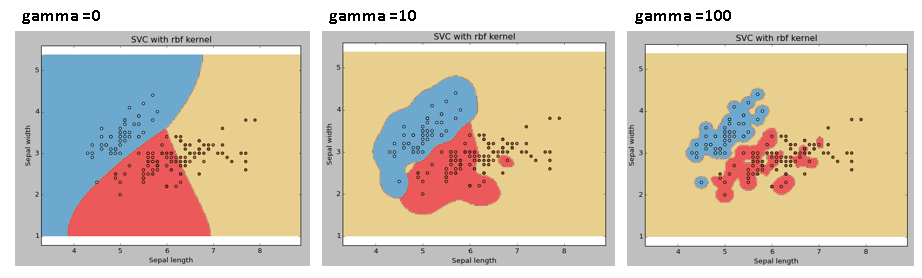

- C: parámetro de penalidad del error. Esto también controla la compensación entre límites de decisión y clasifica los puntos de entrenamiento correctamente.
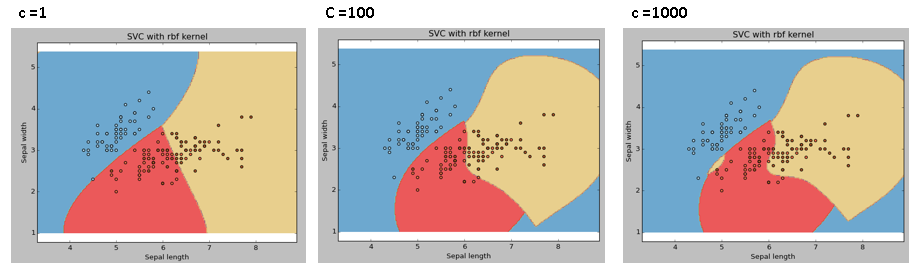

In [ ]:
from sklearn import svm

In [ ]:
# Función para plotear la función de decisión, sólo para 2D
def plot_svc_decision_function(model, ax=None, plot_support=True):
    if ax is None:
        ax = plt.gca()
    xlim = ax.get_xlim()
    ylim = ax.get_ylim()
    
    # create grid to evaluate model
    x = np.linspace(xlim[0], xlim[1], 30)
    y = np.linspace(ylim[0], ylim[1], 30)
    Y, X = np.meshgrid(y, x)
    xy = np.vstack([X.ravel(), Y.ravel()]).T
    P = model.decision_function(xy).reshape(X.shape)
    
    # plot decision boundary and margins
    ax.contour(X, Y, P, colors='k',
               levels=[-1, 0, 1], alpha=0.5,
               linestyles=['--', '-', '--'])
    
    # plot support vectors
    if plot_support:
        ax.scatter(model.support_vectors_[:, 0],
                   model.support_vectors_[:, 1],
                   s=300, linewidth=1, facecolors='none');
    ax.set_xlim(xlim)
    ax.set_ylim(ylim)

In [ ]:
# Proemos los distintos tipos de Kernel (linear, poly, sigmoid, rbf)
clf = svm.SVC(kernel='rbf', C=1E10)
clf.fit(X, y)

In [ ]:
plt.scatter(X[:, 0], X[:, 1], c=y, s=50, cmap='autumn')
plot_svc_decision_function(clf)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1],
            s=300, lw=1, facecolors='none');

## ... apliquemos SVM a nuestro caso de

In [ ]:
import pandas as pd

In [ ]:
df_clientes = pd.read_excel('../data/train_clientes.xlsx')

In [ ]:
df_clientes.index = df_clientes['ID_CORRELATIVO']
df_clientes.drop(columns=['CODMES','ID_CORRELATIVO'], inplace=True)

In [ ]:
# Generamos variables dummy
df_clientes_dum = pd.get_dummies(df_clientes)

In [ ]:
col_missing = df_clientes_dum.isnull().sum()/len(df_clientes_dum)
col_missing = col_missing[col_missing>0]
col_missing

In [ ]:
# Imputamos los valores nulos de las variables numércias por la media
df_clientes_dum['EDAD'] = df_clientes_dum['EDAD'].fillna(np.mean(df_clientes_dum['EDAD']))
df_clientes_dum['ANTIGUEDAD'] = df_clientes_dum['ANTIGUEDAD'].fillna(np.mean(df_clientes_dum['ANTIGUEDAD']))

### Generamos data de entrenamineto y prueba

In [ ]:
y = np.asarray(df_clientes_dum.ATTRITION)
X = np.asarray(df_clientes_dum.drop(columns=['ATTRITION']))

In [ ]:
from sklearn.model_selection import train_test_split
# En este caso, sólo entrenamos con el 20% de los datos
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.8)# Si se quiere fijar la semilla -> random_state=0

In [ ]:
model_svm = svm.SVC(kernel='rbf', C=1, class_weight = 'balanced')
model_svm.fit(X_train, y_train)

### Usaremos la función SIGMOID para determinar las probabilidades según la distancia al hiperplano

In [ ]:
y_pred_class = model_svm.predict(X_test)
#y_pred_prob = model_svm.predict_proba(X_test)
y_pred_dist = model_svm.decision_function(X_test) # calcula la distancia de cada punto de nuestros datos (X_test) al hiperplano

In [ ]:
df_result = pd.DataFrame({'y_pred_class':y_pred_class,'y_test':y_test,'y_pred_dist':y_pred_dist})

In [ ]:
df_result['y_pred_dist_norm'] = 1 / (1 + np.exp(-df_result['y_pred_dist']))

In [ ]:
df_result['y_pred_dist_norm'].hist()

In [ ]:
sns.scatterplot(df_result['y_pred_dist_norm'],df_result['y_pred_class'])

In [ ]:
df_result.groupby('y_pred_class')['y_pred_dist_norm'].describe()

In [ ]:
df_result['decil'] = pd.qcut(df_result['y_pred_dist_norm'], q=11, duplicates='drop')

# Generamos frecuencias absolutas acumuladas
df_freqAcum = df_result.groupby('decil').agg({'y_test':'sum','y_pred_class':'count'}).sort_values('decil', ascending = False).cumsum()
df_freqAcum.reset_index(drop = False, inplace = True)

df_freqAcum.rename(columns={'y_test':'ATTRITION_acum','y_pred_class':'Q_acum'}, inplace=True)

df_freqAcum['ATTRITION_test'] = df_freqAcum.ATTRITION_acum/df_freqAcum.Q_acum
df_freqAcum['%Q'] = df_freqAcum.Q_acum*100/max(df_freqAcum.Q_acum)
df_freqAcum['%ATTRITION_acum'] = df_freqAcum.ATTRITION_acum*100/max(df_freqAcum.ATTRITION_acum)

In [ ]:
sns.set()
sns.lineplot(np.array(range(1,len(df_freqAcum)+1)),df_freqAcum['%ATTRITION_acum'],markers=True,dashes=False)

### Generamos un modelo logístico

In [ ]:
from sklearn.linear_model import LogisticRegression

In [ ]:
model_log = LogisticRegression(fit_intercept=False, class_weight = 'balanced')
model_log.fit(X_train, y_train)

In [ ]:
y_log_pred = model_log.predict(X_test) # 0 , 1
y_log_score_pred = model_log.predict_proba(X_test) # probabilidad

### Generamos un modelo Naive Bayes

In [ ]:
from sklearn.naive_bayes import GaussianNB

In [ ]:
model_nb = GaussianNB()
model_nb.fit(X_train, y_train)

In [ ]:
y_nb_pred = model_nb.predict(X_test) # clases
y_nb_score_pred = model_nb.predict_proba(X_test) # proba

In [ ]:
#from sklearn.metrics import confusion_matrix
#matriz_conf = confusion_matrix(y_log_pred,y_test)

In [ ]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

In [ ]:
nb_roc_auc = roc_auc_score(y_test, y_nb_pred)
log_roc_auc = roc_auc_score(y_test, y_log_pred)
svm_roc_auc = roc_auc_score(y_test, y_pred_class)

fpr_nb, tpr_nb, thresholds = roc_curve(y_test, y_nb_score_pred[:,1])
fpr_log, tpr_log, thresholds = roc_curve(y_test, y_log_score_pred[:,1])
fpr_svm, tpr_svm, thresholds = roc_curve(y_test, df_result['y_pred_dist_norm'])

plt.figure()
plt.plot(fpr_nb, tpr_nb, label='Naive Bayes (area = %0.4f)' % nb_roc_auc)
plt.plot(fpr_log, tpr_log, label='Logistic Regression (area = %0.4f)' % log_roc_auc)
plt.plot(fpr_svm, tpr_svm, label='Super Vector Machine (area = %0.4f)' % svm_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()

Referencias:
- https://www.analyticsvidhya.com/blog/2017/09/understaing-support-vector-machine-example-code/
- https://jakevdp.github.io/PythonDataScienceHandbook/05.07-support-vector-machines.html        
- https://www.analyticsvidhya.com/blog/2014/10/support-vector-machine-simplified/
- https://www.datacamp.com/community/tutorials/svm-classification-scikit-learn-python
- https://www.datacamp.com/community/tutorials/support-vector-machines-r
- http://scikit-learn.org/stable/modules/svm.html#scores-probabilities